In [126]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from datetime import datetime, timezone

In [127]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'AppleGothic'

---

# Load Data

### player_info

In [128]:
base_dir = os.path.dirname(os.getcwd()) 
base_dir

'/Users/hyeon-yugyeong/skn11-projects/project02/SKN11-2nd-4Team'

In [129]:
base_dir = os.path.dirname(os.getcwd())  # 현재 폴더의 부모 디렉토리
path = os.path.join(base_dir, "data/reduction_data/*.csv")
file_paths = glob(path)

player_info_data = pd.DataFrame()

for file in file_paths:
    player_info_data = pd.concat([player_info_data, pd.read_csv(file, encoding="utf-8")], axis=0)

display(player_info_data.head())
print(f"Player information data count : {len(player_info_data)}")

,leagueId,queueType,tier,rank,summonerId,puuid,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak
0,f26c5cb6-bd2d-4200-a242-8df7110fb92d,RANKED_SOLO_5x5,IRON,I,kzfWHgI8V_2cJqjjbTB0yZJbgjQvtFS93SKMqH3YJkrU40Y,8jGtg9MlbzXYQ5Umf4Y7uMqdRMEzmruPsYll-SxwQoFKQG...,12,34,37,False,False,False,False
1,87c4c731-1aa1-4d2e-8d35-e08030ba8efb,RANKED_SOLO_5x5,IRON,I,UJkCh2bS4YO7C7dm1Yl4IT7EzziLzdO_TW_R6N8j-pUGXe...,ji4uoQKx3SS0YeMtjxqMc_KUJQOMSJFi81zLnyiozVp0sS...,97,3,2,False,False,False,False
2,d51830f2-4420-4077-a3b2-effaa7105d57,RANKED_SOLO_5x5,IRON,I,Fp6byjg-SRwFMT7PSfbvGwTqrUmLZHZikAsT9RpJ674xu9...,Dr8ib7fv4pemOqJC-uOKTwVR5fz5Y6l7SZ4hIP4bHurqUZ...,25,7,4,False,False,False,False
3,1df0f655-cf74-4222-8cb7-3e6aef91e83b,RANKED_SOLO_5x5,IRON,I,Bw1lDX9vJrQxNwdg3XYiF73EA7mZ-sxAHyU6gnBG-4qiz_...,H3_TUJhQZkRyzaE12ro9i0hJIkz5RY3qr_s8qiDtwqczwe...,32,10,18,False,False,False,False
4,640dcade-2e4f-4387-a1bc-e1ca4b13eb0c,RANKED_SOLO_5x5,IRON,I,ZbL41OC4EgevPLDBG4ovAANvDvvyDinVGoPKXRcLCtc5kJ...,U-d8m0EbMQeWnD1IXWRR17TxkwoltApIMEB3jjJRKRYY7E...,80,7,6,False,False,False,True


Player information data count : 231930


In [130]:
player_info_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231930 entries, 0 to 69
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   leagueId      231930 non-null  object
 1   queueType     231930 non-null  object
 2   tier          231930 non-null  object
 3   rank          231930 non-null  object
 4   summonerId    231930 non-null  object
 5   puuid         231930 non-null  object
 6   leaguePoints  231930 non-null  int64 
 7   wins          231930 non-null  int64 
 8   losses        231930 non-null  int64 
 9   veteran       231930 non-null  bool  
 10  inactive      231930 non-null  bool  
 11  freshBlood    231930 non-null  bool  
 12  hotStreak     231930 non-null  bool  
dtypes: bool(4), int64(3), object(6)
memory usage: 18.6+ MB


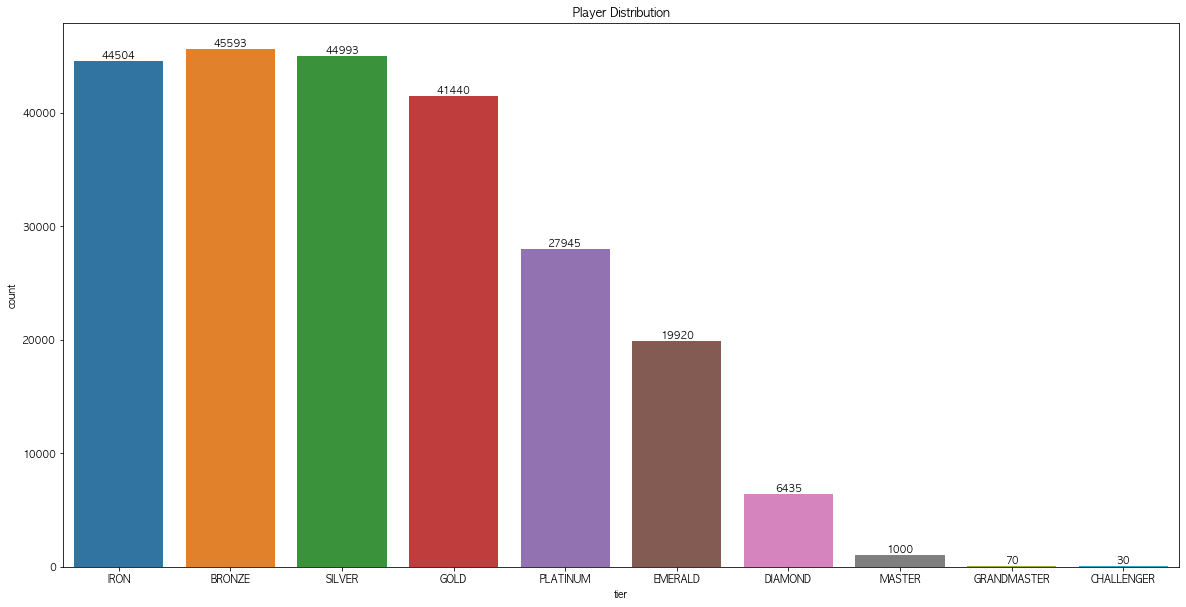

In [131]:
tier_order=['IRON','BRONZE','SILVER','GOLD','PLATINUM','EMERALD','DIAMOND','MASTER','GRANDMASTER','CHALLENGER']

plt.figure(figsize=(20,10))
ax = sns.countplot(data=player_info_data, x='tier', order=tier_order, hue_order=tier_order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', 
                va='bottom',  
                fontsize=10, 
                color='black')  
plt.title('Player Distribution')
plt.show()

In [132]:
player_info_data['leagueId'].nunique() # 231930

29423

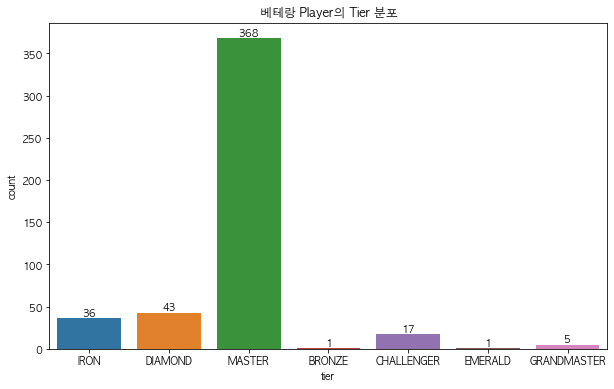

In [133]:
veteran_player = player_info_data[player_info_data['veteran']==True]

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=veteran_player, x='tier')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center', 
        va='bottom',  
        fontsize=10, 
        color='black') 

plt.title("베테랑 Player의 Tier 분포")
plt.show()

In [134]:
# veteran==True인 사람의 티어 분포
player_veteran = player_info_data['veteran']==True
player_veteran

0     False
1     False
2     False
3     False
4     False
      ...  
65    False
66    False
67    False
68    False
69    False
Name: veteran, Length: 231930, dtype: bool

### summoner

In [176]:
path = os.path.join(os.path.split(os.getcwd())[0], "data/summoner/*.csv")
file_path = glob(path)

summoner_data = pd.DataFrame()

for file in file_path:
    summoner_data = pd.concat([summoner_data, pd.read_csv(file, encoding="utf-8")], axis=0)

display(summoner_data.head())
print(f"Summoner data count : {len(summoner_data.index)}")

,id,accountId,puuid,profileIconId,revisionDate,summonerLevel
0,kzfWHgI8V_2cJqjjbTB0yZJbgjQvtFS93SKMqH3YJkrU40Y,icSLs6wHD6MXeiVitcnnkhP-wOAomDL_pmtFMPY5f5ZFpe...,8jGtg9MlbzXYQ5Umf4Y7uMqdRMEzmruPsYll-SxwQoFKQG...,6680,1742720089000,195
1,UJkCh2bS4YO7C7dm1Yl4IT7EzziLzdO_TW_R6N8j-pUGXe...,WPl57MkrPZy_x60hv4-6D4kNobi7UKzkjPebH_Y_yNcICe...,ji4uoQKx3SS0YeMtjxqMc_KUJQOMSJFi81zLnyiozVp0sS...,6502,1737559985000,41
2,Fp6byjg-SRwFMT7PSfbvGwTqrUmLZHZikAsT9RpJ674xu9...,Eo33kaonTf9g83OROj6wF4ipeDxS-axJ5h5uTR_KvWwRa3...,Dr8ib7fv4pemOqJC-uOKTwVR5fz5Y6l7SZ4hIP4bHurqUZ...,5950,1742297642000,147
3,Bw1lDX9vJrQxNwdg3XYiF73EA7mZ-sxAHyU6gnBG-4qiz_...,BnBYfCwSCb0hUPNb9ikaRgsWfgr0RRTdv-2fPmj7aCI_7r...,H3_TUJhQZkRyzaE12ro9i0hJIkz5RY3qr_s8qiDtwqczwe...,3543,1743181417956,123
4,ZbL41OC4EgevPLDBG4ovAANvDvvyDinVGoPKXRcLCtc5kJ...,X1LJxXc_h1D3opvcb82sSh7MqshyT0em9K3Tauyb5Diw45...,U-d8m0EbMQeWnD1IXWRR17TxkwoltApIMEB3jjJRKRYY7E...,907,1738310268000,31


Summoner data count : 231930


In [177]:
summoner_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231930 entries, 0 to 33
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             231930 non-null  object
 1   accountId      231930 non-null  object
 2   puuid          231930 non-null  object
 3   profileIconId  231930 non-null  int64 
 4   revisionDate   231930 non-null  int64 
 5   summonerLevel  231930 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 12.4+ MB


In [178]:
summoner_data = pd.merge(player_info_data, summoner_data, how="outer", on="puuid")
summoner_data.head()

,leagueId,queueType,tier,rank,summonerId,puuid,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,id,accountId,profileIconId,revisionDate,summonerLevel
0,f26c5cb6-bd2d-4200-a242-8df7110fb92d,RANKED_SOLO_5x5,IRON,I,kzfWHgI8V_2cJqjjbTB0yZJbgjQvtFS93SKMqH3YJkrU40Y,8jGtg9MlbzXYQ5Umf4Y7uMqdRMEzmruPsYll-SxwQoFKQG...,12,34,37,False,False,False,False,kzfWHgI8V_2cJqjjbTB0yZJbgjQvtFS93SKMqH3YJkrU40Y,icSLs6wHD6MXeiVitcnnkhP-wOAomDL_pmtFMPY5f5ZFpe...,6680,1742720089000,195
1,87c4c731-1aa1-4d2e-8d35-e08030ba8efb,RANKED_SOLO_5x5,IRON,I,UJkCh2bS4YO7C7dm1Yl4IT7EzziLzdO_TW_R6N8j-pUGXe...,ji4uoQKx3SS0YeMtjxqMc_KUJQOMSJFi81zLnyiozVp0sS...,97,3,2,False,False,False,False,UJkCh2bS4YO7C7dm1Yl4IT7EzziLzdO_TW_R6N8j-pUGXe...,WPl57MkrPZy_x60hv4-6D4kNobi7UKzkjPebH_Y_yNcICe...,6502,1737559985000,41
2,d51830f2-4420-4077-a3b2-effaa7105d57,RANKED_SOLO_5x5,IRON,I,Fp6byjg-SRwFMT7PSfbvGwTqrUmLZHZikAsT9RpJ674xu9...,Dr8ib7fv4pemOqJC-uOKTwVR5fz5Y6l7SZ4hIP4bHurqUZ...,25,7,4,False,False,False,False,Fp6byjg-SRwFMT7PSfbvGwTqrUmLZHZikAsT9RpJ674xu9...,Eo33kaonTf9g83OROj6wF4ipeDxS-axJ5h5uTR_KvWwRa3...,5950,1742297642000,147
3,1df0f655-cf74-4222-8cb7-3e6aef91e83b,RANKED_SOLO_5x5,IRON,I,Bw1lDX9vJrQxNwdg3XYiF73EA7mZ-sxAHyU6gnBG-4qiz_...,H3_TUJhQZkRyzaE12ro9i0hJIkz5RY3qr_s8qiDtwqczwe...,32,10,18,False,False,False,False,Bw1lDX9vJrQxNwdg3XYiF73EA7mZ-sxAHyU6gnBG-4qiz_...,BnBYfCwSCb0hUPNb9ikaRgsWfgr0RRTdv-2fPmj7aCI_7r...,3543,1743181417956,123
4,640dcade-2e4f-4387-a1bc-e1ca4b13eb0c,RANKED_SOLO_5x5,IRON,I,ZbL41OC4EgevPLDBG4ovAANvDvvyDinVGoPKXRcLCtc5kJ...,U-d8m0EbMQeWnD1IXWRR17TxkwoltApIMEB3jjJRKRYY7E...,80,7,6,False,False,False,True,ZbL41OC4EgevPLDBG4ovAANvDvvyDinVGoPKXRcLCtc5kJ...,X1LJxXc_h1D3opvcb82sSh7MqshyT0em9K3Tauyb5Diw45...,907,1738310268000,31


##### 중복 데이터 확인하기

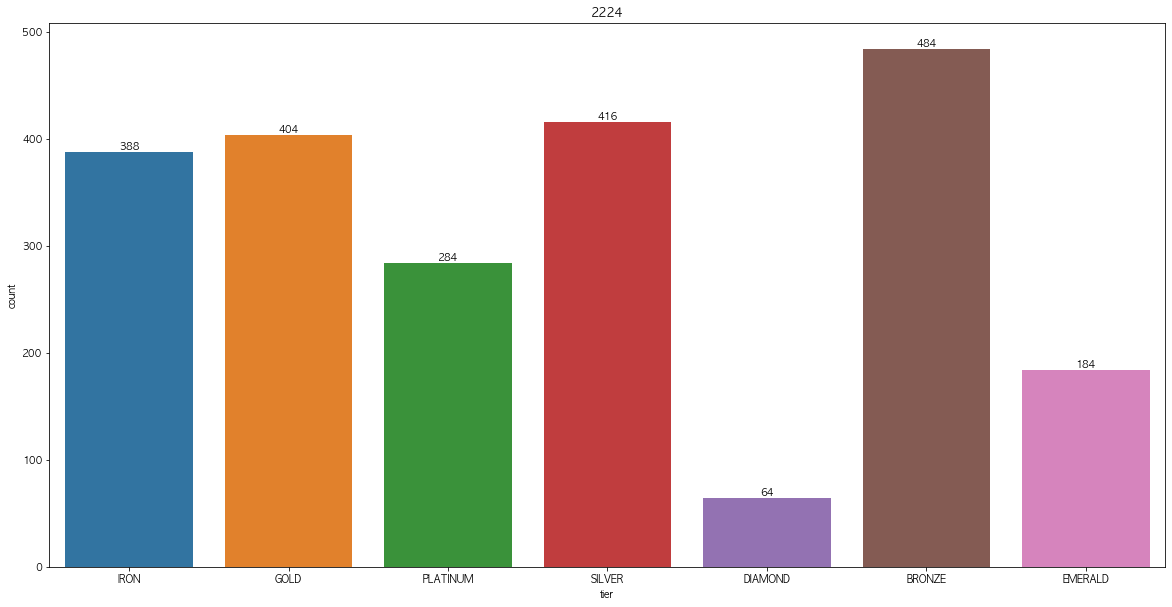

In [179]:
duplicated_summoners = summoner_data[summoner_data.duplicated(subset='summonerId', keep=False)]

plt.figure(figsize=(20,10))
ax = sns.countplot(data=duplicated_summoners, x='tier')

result = 0
for p in ax.patches:
    result += int(p.get_height())
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', 
                va='bottom',  
                fontsize=10, 
                color='black')  
plt.title(f'{result}')
plt.show()

In [180]:
summoner_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233042 entries, 0 to 233041
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   leagueId       233042 non-null  object
 1   queueType      233042 non-null  object
 2   tier           233042 non-null  object
 3   rank           233042 non-null  object
 4   summonerId     233042 non-null  object
 5   puuid          233042 non-null  object
 6   leaguePoints   233042 non-null  int64 
 7   wins           233042 non-null  int64 
 8   losses         233042 non-null  int64 
 9   veteran        233042 non-null  bool  
 10  inactive       233042 non-null  bool  
 11  freshBlood     233042 non-null  bool  
 12  hotStreak      233042 non-null  bool  
 13  id             233042 non-null  object
 14  accountId      233042 non-null  object
 15  profileIconId  233042 non-null  int64 
 16  revisionDate   233042 non-null  int64 
 17  summonerLevel  233042 non-null  int64 
dtypes: b

##### na 데이터 drop하기

In [181]:
summoner_data['revisionDate'].isna().sum()

0

In [184]:
summoner_data = summoner_data.dropna()

In [185]:
# dropna 후
summoner_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233042 entries, 0 to 233041
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   leagueId       233042 non-null  object
 1   queueType      233042 non-null  object
 2   tier           233042 non-null  object
 3   rank           233042 non-null  object
 4   summonerId     233042 non-null  object
 5   puuid          233042 non-null  object
 6   leaguePoints   233042 non-null  int64 
 7   wins           233042 non-null  int64 
 8   losses         233042 non-null  int64 
 9   veteran        233042 non-null  bool  
 10  inactive       233042 non-null  bool  
 11  freshBlood     233042 non-null  bool  
 12  hotStreak      233042 non-null  bool  
 13  id             233042 non-null  object
 14  accountId      233042 non-null  object
 15  profileIconId  233042 non-null  int64 
 16  revisionDate   233042 non-null  int64 
 17  summonerLevel  233042 non-null  int64 
dtypes: b

##### 중복 데이터 drop_duplicates

In [186]:
summoner_data = summoner_data.drop_duplicates()

In [187]:
summoner_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231412 entries, 0 to 233041
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   leagueId       231412 non-null  object
 1   queueType      231412 non-null  object
 2   tier           231412 non-null  object
 3   rank           231412 non-null  object
 4   summonerId     231412 non-null  object
 5   puuid          231412 non-null  object
 6   leaguePoints   231412 non-null  int64 
 7   wins           231412 non-null  int64 
 8   losses         231412 non-null  int64 
 9   veteran        231412 non-null  bool  
 10  inactive       231412 non-null  bool  
 11  freshBlood     231412 non-null  bool  
 12  hotStreak      231412 non-null  bool  
 13  id             231412 non-null  object
 14  accountId      231412 non-null  object
 15  profileIconId  231412 non-null  int64 
 16  revisionDate   231412 non-null  int64 
 17  summonerLevel  231412 non-null  int64 
dtypes: b

In [189]:
summoner_data.isna().sum()

leagueId         0
queueType        0
tier             0
rank             0
summonerId       0
puuid            0
leaguePoints     0
wins             0
losses           0
veteran          0
inactive         0
freshBlood       0
hotStreak        0
id               0
accountId        0
profileIconId    0
revisionDate     0
summonerLevel    0
dtype: int64

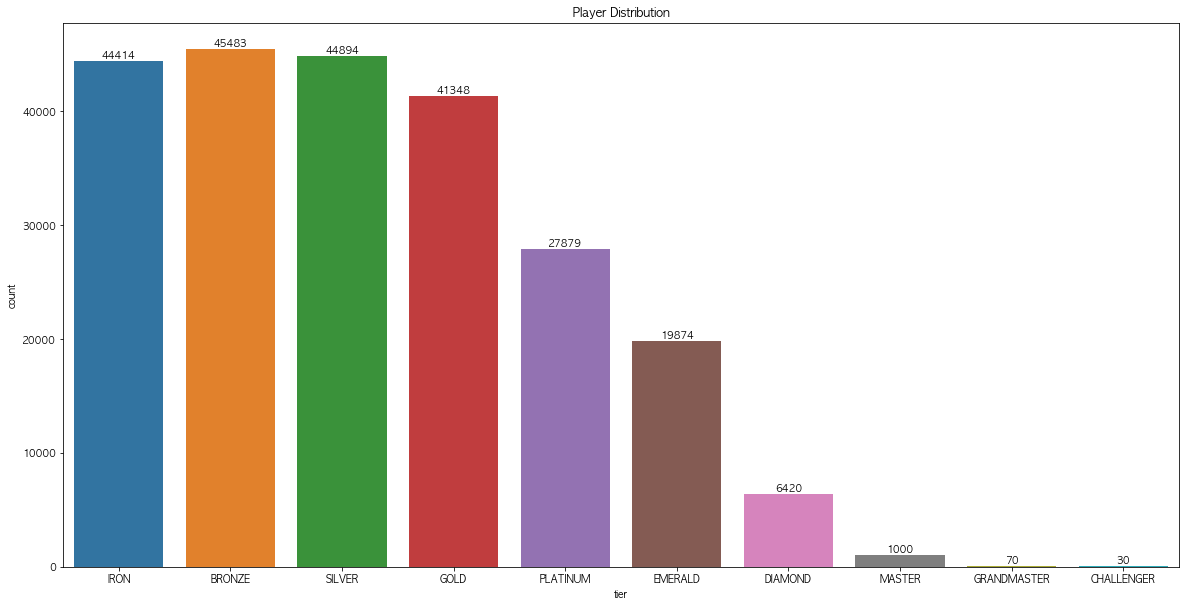

In [190]:
tier_order=['IRON','BRONZE','SILVER','GOLD','PLATINUM','EMERALD','DIAMOND','MASTER','GRANDMASTER','CHALLENGER']

plt.figure(figsize=(20,10))
ax = sns.countplot(data=summoner_data, x='tier', order=tier_order, hue_order=tier_order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', 
                va='bottom',  
                fontsize=10, 
                color='black')  
plt.title('Player Distribution')
plt.show()

In [199]:
df = summoner_data[summoner_data['tier']=='SILVER']
v = df[df['veteran']==True]
v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   leagueId       0 non-null      object
 1   queueType      0 non-null      object
 2   tier           0 non-null      object
 3   rank           0 non-null      object
 4   summonerId     0 non-null      object
 5   puuid          0 non-null      object
 6   leaguePoints   0 non-null      int64 
 7   wins           0 non-null      int64 
 8   losses         0 non-null      int64 
 9   veteran        0 non-null      bool  
 10  inactive       0 non-null      bool  
 11  freshBlood     0 non-null      bool  
 12  hotStreak      0 non-null      bool  
 13  id             0 non-null      object
 14  accountId      0 non-null      object
 15  profileIconId  0 non-null      int64 
 16  revisionDate   0 non-null      int64 
 17  summonerLevel  0 non-null      int64 
dtypes: bool(4), int64(6), object(8)
memory usa

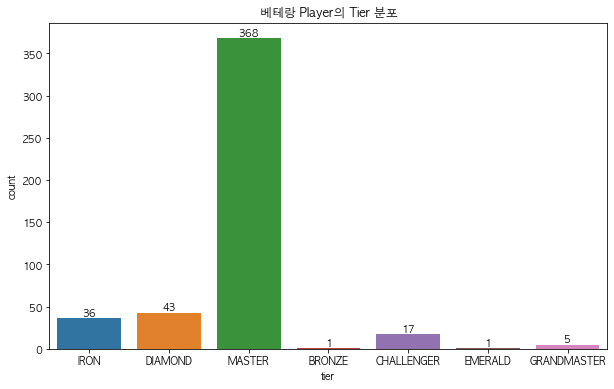

In [ ]:
veteran_player = summoner_data[summoner_data['veteran']==True]
# tier_order=['IRON','BRONZE','SILVER','GOLD','PLATINUM','EMERALD','DIAMOND','MASTER','GRANDMASTER','CHALLENGER'] # gold, silver, PLATINUM

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=veteran_player, x='tier')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center', 
        va='bottom',  
        fontsize=10, 
        color='black') 

plt.title("베테랑 Player의 Tier 분포")
plt.show()